## Create a cohort by filtering on desired clinical characteristics
Here we demonstrate how to explore CDA hosted data and create a cohort of cases by filtering on clinical characteristics. In this case we will generate a subset of cases that meet specific age, sex, and cancer stage requirements.

In [3]:
from cdapython import Q, columns, unique_terms
import cdapython
import pandas as pd
import matplotlib.pyplot as plt
print(cdapython.__file__)
print(cdapython.__version__)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/Users/dboles/Documents/python/working/cda-python/cdapython/__init__.py
2022.3.22


In [4]:
from ipywidgets import Dropdown
from IPython.display import display
tester_check = Dropdown(
    options=[True,False],
    description='Tester:',
    value=True,
)
display(tester_check)

Dropdown(description='Tester:', options=(True, False), value=True)

In [5]:
if(tester_check.value): Q.set_host_url("http://35.192.60.10:8080/")
else: Q.set_host_url("https://cda.cda-dev.broadinstitute.org")

print(Q.get_host_url())

http://35.192.60.10:8080/


### Getting information about the CDA structure
First let's print the list of data fields available in the CDA by calling the `columns()` function from the cdapython library. This returns a list of the top level column structure of the CDA data table. Many of these columns are further nested, this nesting is denoted by '.' separators.

You can see another visualization of this structure in the CDA readthedocs: https://cda.readthedocs.io/en/latest/Schema.html

Note: If you receive an SSL authentification error pass the `verify=False` flag 

In [6]:
columns() # use verify to bypass 
          # "certificate verify failed" errors 

['id',
 'identifier',
 'identifier.system',
 'identifier.value',
 'species',
 'sex',
 'race',
 'ethnicity',
 'days_to_birth',
 'subject_associated_project',
 'vital_status',
 'age_at_death',
 'cause_of_death',
 'ResearchSubject',
 'ResearchSubject.id',
 'ResearchSubject.identifier',
 'ResearchSubject.identifier.system',
 'ResearchSubject.identifier.value',
 'ResearchSubject.member_of_research_project',
 'ResearchSubject.primary_diagnosis_condition',
 'ResearchSubject.primary_diagnosis_site',
 'ResearchSubject.Diagnosis',
 'ResearchSubject.Diagnosis.id',
 'ResearchSubject.Diagnosis.identifier',
 'ResearchSubject.Diagnosis.identifier.system',
 'ResearchSubject.Diagnosis.identifier.value',
 'ResearchSubject.Diagnosis.primary_diagnosis',
 'ResearchSubject.Diagnosis.age_at_diagnosis',
 'ResearchSubject.Diagnosis.morphology',
 'ResearchSubject.Diagnosis.stage',
 'ResearchSubject.Diagnosis.grade',
 'ResearchSubject.Diagnosis.method_of_diagnosis',
 'ResearchSubject.Diagnosis.Treatment',
 'Rese

### With this structure in hand we can begin setting up a cohort
Let's take a look at what cancer locations there are by using the ```unique_values()``` function. The function takes a field name and returns the set of values in this field.

In [7]:
unique_terms('ResearchSubject.primary_diagnosis_site')

[None,
 'Adrenal gland',
 'Anus and anal canal',
 'Base of tongue',
 'Bladder',
 'Bones, joints and articular cartilage of limbs',
 'Bones, joints and articular cartilage of other and unspecified sites',
 'Brain',
 'Breast',
 'Bronchus and lung',
 'Cervix uteri',
 'Colon',
 'Connective, subcutaneous and other soft tissues',
 'Corpus uteri',
 'Esophagus',
 'Eye and adnexa',
 'Floor of mouth',
 'Gallbladder',
 'Gum',
 'Head and Neck',
 'Heart, mediastinum, and pleura',
 'Hematopoietic and reticuloendothelial systems',
 'Hypopharynx',
 'Kidney',
 'Larynx',
 'Lip',
 'Liver',
 'Liver and intrahepatic bile ducts',
 'Lung',
 'Lymph nodes',
 'Meninges',
 'Nasal cavity and middle ear',
 'Nasopharynx',
 'Not Reported',
 'Oropharynx',
 'Other and ill-defined digestive organs',
 'Other and ill-defined sites',
 'Other and ill-defined sites in lip, oral cavity and pharynx',
 'Other and ill-defined sites within respiratory system and intrathoracic organs',
 'Other and unspecified female genital organ

For this example we will continue with kidney cancer. We will use the ```Q()``` function to return all the subjects where the anatomical site is "Kidney".

In [8]:
q1 = Q('ResearchSubject.primary_diagnosis_site = "Kidney"')
r1 = q1.run(limit=500)
r1

Getting results from database

Total execution time: 6648 ms



            QueryID: 3b27554b-8611-403c-9059-4cbbcae5a1ee
            Query:SELECT all_v3_0_subjects_meta.* FROM gdc-bq-sample.dev.all_v3_0_subjects_meta AS all_v3_0_subjects_meta, UNNEST(all_v3_0_subjects_meta.ResearchSubject) AS _ResearchSubject WHERE (UPPER(_ResearchSubject.primary_diagnosis_site) = UPPER('Kidney'))
            Offset: 0
            Count: 500
            Total Row Count: 3415
            GDC Count: 497 
 	PDC Count: 34 
 	IDC Count: 54
            More pages: True
        

### The results of queries are returned in a paginated object
From the printed output we can infer that there are 3415 rows that match this request. These results are separated into 7 pages, each containing a maximum of 500 results. The results object `r1` by default holds the json for the first 500. We can move forward and backward one page by calling `r1.next_page()` and `r1.prev_page()` and we can convert the into a padas dataframe with the `to_dataframe()` funtion. 

In [9]:
df = r1.to_dataframe()
df.head(3)

,id,identifier,species,sex,race,ethnicity,days_to_birth,subject_associated_project,vital_status,age_at_death,cause_of_death,ResearchSubject
0,GENIE-DFCI-006869,"[{'system': 'GDC', 'value': 'GENIE-DFCI-006869'}]",Homo sapiens,male,white,not hispanic or latino,-23376,[GENIE-DFCI],Not Reported,None,None,[{'id': 'e2005faf-a888-4e4f-9082-c38f69bc3cd7'...
1,AD17494,"[{'system': 'GDC', 'value': 'AD17494'}]",Homo sapiens,male,not reported,not reported,None,[FM-AD],Not Reported,None,None,[{'id': '0627cac0-fe73-4e54-92f9-640c2512ded2'...
2,TARGET-30-PAUTVX,"[{'system': 'GDC', 'value': 'TARGET-30-PAUTVX'}]",Homo sapiens,male,white,not hispanic or latino,None,[TARGET-NBL],Alive,None,None,[{'id': 'fd2adca8-7a79-5562-aaac-6d04e18f2be4'...


### Some fields of the results are further nested
Note that there are some columns, such as ResearchSubject, in this data frame that are further nested. We can expand these columns by passing the `record_path` flag to the `to_dataframe` function.

In [10]:
df1_sub = r1.to_dataframe(record_path=['ResearchSubject', 'Diagnosis'])
df1_sub.head(3)

,id,identifier,primary_diagnosis,age_at_diagnosis,morphology,stage,grade,method_of_diagnosis,Treatment
0,751f13c8-cea6-47b9-9d38-4956784c4b27,"[{'system': 'GDC', 'value': '751f13c8-cea6-47b...","Papillary adenocarcinoma, NOS",None,8260/3,None,Not Reported,None,[]
1,ff614c34-567e-4f47-9d62-ac69929df0fd,"[{'system': 'GDC', 'value': 'ff614c34-567e-4f4...","Renal cell carcinoma, NOS",21028,8312/3,None,Not Reported,None,[]
2,8614f0d0-feb6-5f36-a733-e372d094e310,"[{'system': 'GDC', 'value': '8614f0d0-feb6-5f3...","Neuroblastoma, NOS",1420,9500/3,None,Not Reported,None,[]


### Looping over paginated results
The above code only interacted with the first 500 entries of the results of our query. To retrieve the full set we can loop over our results page by page and concatenate them into a single dataframe.

In [11]:
r1 = Q('ResearchSubject.primary_diagnosis_site = "Kidney"').run(limit=500)
df = pd.DataFrame()
for index, frame in enumerate(r1.paginator(to_df=True)):
    print(f"Reading Page {index}")
    df = pd.concat([df, frame])
print(f'# of rows in df - {len(df)}')

Getting results from database

Total execution time: 5711 ms
Reading Page 0
Reading Page 1
Reading Page 2
Reading Page 3
Reading Page 4
Reading Page 5
Reading Page 6
Destructor called, Employee deleted.
# of rows in df - 3415


In [12]:
df.head(3)

,id,identifier,species,sex,race,ethnicity,days_to_birth,subject_associated_project,vital_status,age_at_death,cause_of_death,ResearchSubject
0,GENIE-DFCI-006869,"[{'system': 'GDC', 'value': 'GENIE-DFCI-006869'}]",Homo sapiens,male,white,not hispanic or latino,-23376,[GENIE-DFCI],Not Reported,None,None,[{'id': 'e2005faf-a888-4e4f-9082-c38f69bc3cd7'...
1,AD17494,"[{'system': 'GDC', 'value': 'AD17494'}]",Homo sapiens,male,not reported,not reported,None,[FM-AD],Not Reported,None,None,[{'id': '0627cac0-fe73-4e54-92f9-640c2512ded2'...
2,TARGET-30-PAUTVX,"[{'system': 'GDC', 'value': 'TARGET-30-PAUTVX'}]",Homo sapiens,male,white,not hispanic or latino,None,[TARGET-NBL],Alive,None,None,[{'id': 'fd2adca8-7a79-5562-aaac-6d04e18f2be4'...


### We can further subset by chaining queries
We can now further subset our results by filtering for a specific tumor stage in a second query, in this case we'll first run an independent query to retrieve all Stage I and Stage II results, we'll investigate the distribution of ages in this sampling, and then further subset by this characteristic.

In [13]:
q2 = Q('ResearchSubject.Diagnosis.stage = "Stage I"').OR(Q('ResearchSubject.Diagnosis.stage = "Stage II"'))
r2 = q2.run(limit=500)
r2

Getting results from database

Total execution time: 7244 ms



            QueryID: 6d3422b0-b802-4306-85a2-8a9d9c30e992
            Query:SELECT all_v3_0_subjects_meta.* FROM gdc-bq-sample.dev.all_v3_0_subjects_meta AS all_v3_0_subjects_meta, UNNEST(all_v3_0_subjects_meta.ResearchSubject) AS _ResearchSubject, UNNEST(_ResearchSubject.Diagnosis) AS _ResearchSubject_Diagnosis WHERE ((UPPER(_ResearchSubject_Diagnosis.stage) = UPPER('Stage I')) OR (UPPER(_ResearchSubject_Diagnosis.stage) = UPPER('Stage II')))
            Offset: 0
            Count: 226
            Total Row Count: 226
            GDC Count: 223 
 	PDC Count: 226 
 	IDC Count: 59
            More pages: False
        

In [14]:
q12 = q1.AND(q2)
r12 = q12.run()
df_ageix = r12.to_dataframe( record_path=['ResearchSubject','Diagnosis'] )
df_ageix.head(3)

Getting results from database

Total execution time: 4510 ms


,id,identifier,primary_diagnosis,age_at_diagnosis,morphology,stage,grade,method_of_diagnosis,Treatment
0,817d49eb-be31-4f54-9597-1d6e8746000c,"[{'system': 'GDC', 'value': '817d49eb-be31-4f5...","Renal cell carcinoma, NOS",32872,8312/3,None,G3,None,[]
1,4f3df0dd-2c37-11ec-b712-0a4e2186f121,"[{'system': 'PDC', 'value': '4f3df0dd-2c37-11e...","Renal cell carcinoma, NOS",32872,None,Stage II,G3,None,[]
2,9c0bb978-09cd-4a5b-a1ae-de107a72d07a,"[{'system': 'GDC', 'value': '9c0bb978-09cd-4a5...","Renal cell carcinoma, NOS",24122,8312/3,None,G2,None,[]


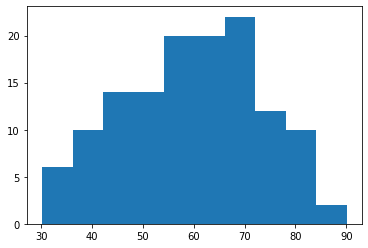

In [15]:
ages = [int(x)/365 for x in df_ageix["age_at_diagnosis"]]
jnk = plt.hist(ages)

### We can limit the age range directly with CDA queries

In [16]:
q3 = Q('ResearchSubject.Diagnosis.age_at_diagnosis <= 80*365') 
q4 = Q('ResearchSubject.Diagnosis.age_at_diagnosis >= 50*365') 
q34 = q3.AND(q4)
r34 = q34.run()
r34

Getting results from database

Total execution time: 4612 ms



            QueryID: 6b6365b7-7b8b-43c3-83b0-01c5c196ff67
            Query:SELECT all_v3_0_subjects_meta.* FROM gdc-bq-sample.dev.all_v3_0_subjects_meta AS all_v3_0_subjects_meta, UNNEST(all_v3_0_subjects_meta.ResearchSubject) AS _ResearchSubject, UNNEST(_ResearchSubject.Diagnosis) AS _ResearchSubject_Diagnosis WHERE ((_ResearchSubject_Diagnosis.age_at_diagnosis <= 80*365) AND (_ResearchSubject_Diagnosis.age_at_diagnosis >= 50*365))
            Offset: 0
            Count: 100
            Total Row Count: 24608
            GDC Count: 99 
 	PDC Count: 12 
 	IDC Count: 16
            More pages: True
        

### Combining all of our queries into one
Now to generate the final cohort we can chain all of the previous queries and pull the results into a data frame.

In [17]:
q1234 = q1.AND(q2.AND(q3).AND(q4))
r1234 = q1234.run()
r1234

Getting results from database

Total execution time: 4812 ms



            QueryID: 2198e460-f82c-45d1-bd04-7eb574abc16e
            Query:SELECT all_v3_0_subjects_meta.* FROM gdc-bq-sample.dev.all_v3_0_subjects_meta AS all_v3_0_subjects_meta, UNNEST(all_v3_0_subjects_meta.ResearchSubject) AS _ResearchSubject, UNNEST(_ResearchSubject.Diagnosis) AS _ResearchSubject_Diagnosis WHERE ((UPPER(_ResearchSubject.primary_diagnosis_site) = UPPER('Kidney')) AND ((((UPPER(_ResearchSubject_Diagnosis.stage) = UPPER('Stage I')) OR (UPPER(_ResearchSubject_Diagnosis.stage) = UPPER('Stage II'))) AND (_ResearchSubject_Diagnosis.age_at_diagnosis <= 80*365)) AND (_ResearchSubject_Diagnosis.age_at_diagnosis >= 50*365)))
            Offset: 0
            Count: 44
            Total Row Count: 44
            GDC Count: 44 
 	PDC Count: 44 
 	IDC Count: 12
            More pages: False
        

In [18]:
df_final = r1234.to_dataframe()
df_final

,id,identifier,species,sex,race,ethnicity,days_to_birth,subject_associated_project,vital_status,age_at_death,cause_of_death,ResearchSubject
0,C3N-00832,"[{'system': 'GDC', 'value': 'C3N-00832'}, {'sy...",Homo sapiens,male,not reported,not reported,-28920,"[CPTAC-3, CPTAC3-Discovery, cptac_ccrcc]",Alive,None,Not Reported,[{'id': '8577ef8a-f071-49cc-8158-05dfc52f3c70'...
1,C3N-00317,"[{'system': 'GDC', 'value': 'C3N-00317'}, {'sy...",Homo sapiens,female,not reported,not reported,-27092,"[CPTAC-3, CPTAC3-Discovery]",Alive,None,Not Reported,[{'id': '0d81506b-7823-4ef2-8c94-d8fa624a51a1'...
2,C3N-00646,"[{'system': 'GDC', 'value': 'C3N-00646'}, {'sy...",Homo sapiens,female,not reported,not reported,-21144,"[CPTAC-3, CPTAC3-Discovery]",Alive,None,Not Reported,[{'id': '68daae26-f752-43de-bf53-a0737e50d00e'...
3,C3N-00380,"[{'system': 'GDC', 'value': 'C3N-00380'}, {'sy...",Homo sapiens,female,not reported,not reported,-20938,"[CPTAC-3, CPTAC3-Discovery, cptac_ccrcc]",Alive,None,Not Reported,[{'id': '57b28192-8454-4ec2-914e-9228456d8648'...
4,C3L-00610,"[{'system': 'GDC', 'value': 'C3L-00610'}, {'sy...",Homo sapiens,female,white,not hispanic or latino,-20900,"[CPTAC-3, CPTAC3-Discovery, cptac_ccrcc]",Alive,None,Not Reported,[{'id': '872dc350-1ca9-4910-a76e-e244d9636f46'...
5,C3N-00494,"[{'system': 'GDC', 'value': 'C3N-00494'}, {'sy...",Homo sapiens,male,not reported,not reported,-24122,"[CPTAC-3, CPTAC3-Discovery, cptac_ccrcc]",Alive,None,Not Reported,[{'id': '239a5fbb-0145-46f6-8ec3-2a96a04011dd'...
6,C3L-00907,"[{'system': 'GDC', 'value': 'C3L-00907'}, {'sy...",Homo sapiens,male,white,not hispanic or latino,-20369,"[CPTAC-3, CPTAC3-Discovery]",Alive,None,Not Reported,[{'id': '17e6c62f-cc0c-4e13-a80c-f9bd6c2cfb0d'...
7,C3N-00834,"[{'system': 'GDC', 'value': 'C3N-00834'}, {'sy...",Homo sapiens,male,not reported,not reported,-23908,"[CPTAC-3, CPTAC3-Discovery]",Alive,None,Not Reported,[{'id': 'c5e1950a-e724-4d42-bd0d-fb474921e04e'...
8,C3N-00154,"[{'system': 'GDC', 'value': 'C3N-00154'}, {'sy...",Homo sapiens,male,not reported,not reported,-25116,"[CPTAC-3, CPTAC3-Discovery]",Alive,None,Not Reported,[{'id': '1eaa044d-6d5c-462d-90f4-60b5280c5c7a'...
9,C3L-00583,"[{'system': 'GDC', 'value': 'C3L-00583'}, {'sy...",Homo sapiens,male,white,hispanic or latino,-20237,"[CPTAC-3, CPTAC3-Discovery]",Alive,None,Not Reported,[{'id': 'da4a0eed-b755-49b8-96ae-31d3d396862c'...


### The final cohort
Our final dataset is 44 total cases of stage I or stage II kidney cancer, between the ages of 50 and 80. We can see that all of these cases stem from CPTAC3, as well as their clinical characteristics such as vital status, sex, cause of death, as well as more details in the ResearchSubject field. If we want a list of ids, we can easily retrieve these also via the CDA.

In [19]:
ids = df_final['id']
print(ids)

0     C3N-00832
1     C3N-00317
2     C3N-00646
3     C3N-00380
4     C3L-00610
5     C3N-00494
6     C3L-00907
7     C3N-00834
8     C3N-00154
9     C3L-00583
10    C3N-00315
11    C3N-01214
12    C3L-00359
13    C3L-01560
14    C3L-00581
15    C3N-00242
16    C3L-00902
17    C3N-01524
18    C3L-00026
19    C3N-00831
20    C3N-00573
21    C3L-00908
22    C3N-01648
23    C3L-01861
24    C3L-00097
25    C3N-01261
26    C3L-00448
27    C3L-00360
28    C3N-01651
29    C3N-00148
30    C3L-01352
31    C3L-01885
32    C3N-00305
33    C3L-00796
34    C3N-01180
35    C3N-00495
36    C3L-00766
37    C3N-00314
38    C3L-00812
39    C3L-01288
40    C3L-00765
41    C3L-01553
42    C3L-01603
43    C3L-00910
Name: id, dtype: object
